### 데이터 간단 EDA 

노션이 제시하는 방향 : OTT별 고객층 인구 통계학적 특성 선호 장르 평점 경향성등 특징 비교   





In [636]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [637]:
# read csv 

df =pd.read_csv("./Data_bob//titles.csv")
df_credit = pd.read_csv("./Data_bob/credits.csv")




In [638]:
df.head()

,Unnamed: 0,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
0,0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,AmazonPrime
1,1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,AmazonPrime
2,2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8,AmazonPrime
3,3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4,AmazonPrime
4,4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6,AmazonPrime


In [639]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [640]:
"""
각 계절마다 보는 영화나 쇼 
런타임 긴 영화 순위 짧은 영화 순위 

"""
df.describe()


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,24877.000000,24877.000000,7164.000000,22403.000000,2.237200e+04,24071.000000,21567.000000
mean,2006.138562,75.971982,3.123534,6.287323,2.098952e+04,17.577640,6.456596
std,22.406687,36.588651,4.293499,1.292541,8.825699e+04,95.647613,1.408923
min,1912.000000,0.000000,1.000000,1.000000,5.000000e+00,0.000011,0.500000
25%,2005.000000,46.000000,1.000000,5.500000,2.140000e+02,1.821000,5.700000
50%,2016.000000,83.000000,2.000000,6.400000,1.122000e+03,4.493000,6.500000
75%,2019.000000,99.000000,3.000000,7.200000,6.373250e+03,12.130000,7.400000
max,2022.000000,549.000000,63.000000,9.900000,2.294231e+06,9323.832000,10.000000


In [641]:
df.corr()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.030486,-0.439780,0.091987,0.007953,0.057579,0.205085
runtime,-0.030486,1.000000,0.001909,-0.199542,0.152910,-0.025257,-0.261446
seasons,-0.439780,0.001909,1.000000,0.016232,0.169241,0.087614,-0.044247
imdb_score,0.091987,-0.199542,0.016232,1.000000,0.202514,0.070895,0.617578
imdb_votes,0.007953,0.152910,0.169241,0.202514,1.000000,0.169403,0.148987
tmdb_popularity,0.057579,-0.025257,0.087614,0.070895,0.169403,1.000000,0.099467
tmdb_score,0.205085,-0.261446,-0.044247,0.617578,0.148987,0.099467,1.000000


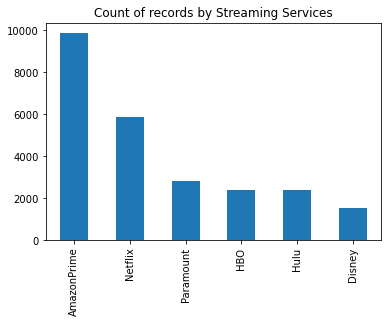

In [642]:
# 각 플랫폼 영화 숫자 파악 
#pokemon["Type 2"].value_counts().plot(kind="bar")
#"Count of records by Streaming Services"

df["platform"].value_counts().plot(kind="bar")
plt.title("Count of records by Streaming Services")
plt.show()

<AxesSubplot:xlabel='tmdb_popularity', ylabel='Density'>

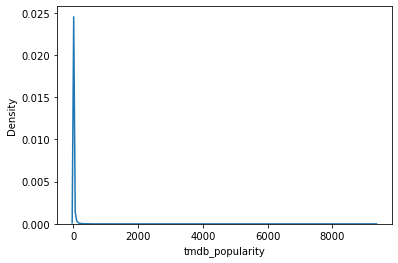

In [643]:

# vote 시각화 해보기 
sns.kdeplot(df["tmdb_popularity"])

In [644]:
df.shape

(24877, 16)

In [645]:
# 4개 모두 만족 확인 
df[(df["imdb_votes"].isna()==True)&(df["imdb_score"].isna()==True)&(df["tmdb_popularity"].isna()==True)&(df["tmdb_score"].isna()==True)]


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
672,tm582037,Ye Shang Hai,MOVIE,NaN,1941,NaN,62,['drama'],[],NaN,tt3594666,NaN,NaN,NaN,NaN,AmazonPrime
731,tm686160,Peculiar Pets,MOVIE,"In this documentary, we meet the families whom...",1921,NaN,47,['documentation'],[],NaN,tt0981329,NaN,NaN,NaN,NaN,AmazonPrime
795,tm769632,Sri Valli,MOVIE,"Valli, a tribal girl falls in love with Muruga...",1945,NaN,114,['drama'],[],NaN,tt0240922,NaN,NaN,NaN,NaN,AmazonPrime
1661,tm544335,Dhonni Meye,MOVIE,NaN,1975,NaN,133,['drama'],[],NaN,tt5526358,NaN,NaN,NaN,NaN,AmazonPrime
1664,tm539392,John Brown's Body,MOVIE,Television play based on the Pulitzer prize- w...,1962,NaN,90,['drama'],[],NaN,tt5868054,NaN,NaN,NaN,NaN,AmazonPrime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24044,ts107355,pocket.watch HobbyKidsTV Ultimate mishmash,SHOW,NaN,2018,TV-G,9,['family'],['US'],1.0,tt8927760,NaN,NaN,NaN,NaN,Hulu
24045,ts107358,pocket.watch JillianTubeHD Ultimate mishmash,SHOW,JillianTubeHD is sharing her love of creative ...,2018,TV-G,17,['family'],['US'],1.0,tt8927812,NaN,NaN,NaN,NaN,Hulu
24599,tm1053160,Blippi's Snowflake Scavenger Hunt,MOVIE,Blippi embarks on an amazing holiday scavenger...,2020,NaN,52,[],[],NaN,tt14296338,NaN,NaN,NaN,NaN,Hulu
24602,ts265434,Jillian's Mystery Craft Box by pocket.watch,SHOW,NaN,2020,NaN,13,['family'],[],1.0,tt12670014,NaN,NaN,NaN,NaN,Hulu


In [646]:
# 4개 만족하는거 drop하기 
index_drop=df[(df["imdb_votes"].isna()==True)&(df["imdb_score"].isna()==True)&(df["tmdb_popularity"].isna()==True)&(df["tmdb_score"].isna()==True)].index
df.drop(index_drop,inplace=True)



In [647]:
df.shape

(24583, 16)

In [648]:
df.loc[20133]

id                                                                 ts7844
title                                                 Doogie Howser, M.D.
type                                                                 SHOW
description             Doogie Howser, M.D. is an American television ...
release_year                                                         1989
age_certification                                                     NaN
runtime                                                                23
genres                                      ['comedy', 'drama', 'family']
production_countries                                               ['US']
seasons                                                               4.0
imdb_id                                                         tt0096569
imdb_score                                                            6.5
imdb_votes                                                         8779.0
tmdb_popularity                       

In [649]:
# 결측치 확인 
df.isnull().sum()

id                          0
title                       0
type                        0
description                87
release_year                0
age_certification       12076
runtime                     0
genres                      0
production_countries        0
seasons                 17516
imdb_id                  1890
imdb_score               2180
imdb_votes               2211
tmdb_popularity           512
tmdb_score               3016
platform                    0
dtype: int64

In [650]:
df["imdb_votes"].mean()

20989.516583229037

In [651]:
df["tmdb_popularity"].mean()

17.57764027120274

In [652]:
df["imdb_score"].mean()

6.287323126367002

In [653]:
df["tmdb_score"].mean()

6.45659567858304

In [654]:
# title 결측치 삭제 하기 
df = df[~df["title"].isnull()]


# age_certification 결측치 없에기 

print(df["age_certification"].unique())
df["age_certification"].fillna("Not Rated",inplace=True)

# seasons의 nan은 0으로 하기 
df["seasons"].fillna(0,inplace=True)


#나머지 결측치는 평균값으로 하기 
df["imdb_score"].fillna(df["imdb_score"].mean(),inplace=True)
df["imdb_votes"].fillna(df["imdb_votes"].mode()[0],inplace=True)
df["tmdb_popularity"].fillna(df["tmdb_popularity"].mode()[0],inplace=True)
df["tmdb_score"].fillna(df["tmdb_score"].mean(),inplace=True)


['TV-PG' nan 'PG' 'G' 'PG-13' 'R' 'TV-G' 'TV-Y' 'TV-14' 'NC-17' 'TV-Y7'
 'TV-MA']


In [655]:
# 결측치 확인 
df.isnull().sum()

id                         0
title                      0
type                       0
description               87
release_year               0
age_certification          0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                 1890
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
platform                   0
dtype: int64

In [656]:
df[df["id"]=="tm1018386"]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
22477,tm1018386,The United States vs. Billie Holiday Special: ...,MOVIE,A conversation moderated by Oprah Winfrey with...,2021,Not Rated,45,['drama'],['US'],0.0,NaN,6.287323,8.0,1.4,9.0,HBO
24875,tm1018386,The United States vs. Billie Holiday Special: ...,MOVIE,A conversation moderated by Oprah Winfrey with...,2021,Not Rated,45,['drama'],['US'],0.0,NaN,6.287323,8.0,1.4,9.0,Hulu


In [657]:
#drop_id_idx=(df[(df["imdb_id"].isna()==True)]["title"].duplicated()).index

#id_drop = (df[(df["imdb_id"].isna()==True)]["title"].duplicated())


In [658]:

"""
행 추가
id 같은거 하나 삭제 하고 플랫폼 합치기 
-> 같은 이름의 타이틀 제거 가능

근데 id가 결측치인데 타이틀 같은거는 어떻게 하냐> 일단 위에 꺼 하고 난다음 진행하시죠 
"""

g = df["platform"].groupby(df["id"]).sum()
g
#for i in D.columns:
 #   df.["imdb_id"][str(i)] = g[i]

id
tm1                        Disney
tm100001     AmazonPrimeParamount
tm1000022             AmazonPrime
tm1000037                 Netflix
tm1000070                 HBOHulu
                     ...         
ts99532                 Paramount
ts99533                 Paramount
ts99534                 Paramount
ts99535                 Paramount
ts99814                   Netflix
Name: platform, Length: 20133, dtype: object

In [659]:
df.drop_duplicates(subset=["id"],inplace=True)


In [660]:
df.shape # 줄어든거 확인 

(20133, 16)

In [661]:
g.shape[0]

20133

In [662]:
g=g.reset_index()
g["platform"]

0                      Disney
1        AmazonPrimeParamount
2                 AmazonPrime
3                     Netflix
4                     HBOHulu
                 ...         
20128               Paramount
20129               Paramount
20130               Paramount
20131               Paramount
20132                 Netflix
Name: platform, Length: 20133, dtype: object

In [663]:
df.isnull().sum()

id                         0
title                      0
type                       0
description               83
release_year               0
age_certification          0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                 1707
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
platform                   0
dtype: int64

In [664]:
#df["platform"] = g

df["platform"] = g["platform"]

In [665]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,Disney
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not Rated,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.2,89766.0,8.647,8.0,AmazonPrimeParamount
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,Not Rated,171,"['romance', 'war', 'drama']",['US'],0.0,tt0036868,8.1,63026.0,8.435,7.8,AmazonPrime
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"['comedy', 'drama', 'romance']",['US'],0.0,tt0032599,7.8,57835.0,11.270,7.4,Netflix
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,Not Rated,94,"['thriller', 'drama', 'romance']",['US'],0.0,tt0042593,7.9,30924.0,8.273,7.6,HBOHulu


In [666]:
df.dtypes



id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
platform                 object
dtype: object

In [667]:
df.shape

(20133, 16)

In [668]:
idx=df[df["platform"].isna()==True].index

df.drop(idx,inplace=True)

In [669]:
M=df["imdb_votes"].quantile(0.95)

In [670]:
C=df["imdb_score"].mean()

In [671]:

#imdb_pop 계산 


df["imdb_pop"] = (df["imdb_votes"]/(df["imdb_votes"]+M))*df["imdb_score"] +(M/(df["imdb_votes"]+M))*C




In [672]:
df.shape

(18068, 17)

In [673]:
df.isnull().sum()

id                         0
title                      0
type                       0
description               79
release_year               0
age_certification          0
runtime                    0
genres                     0
production_countries       0
seasons                    0
imdb_id                 1579
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
platform                   0
imdb_pop                   0
dtype: int64

In [674]:
#normalization_df_imdb_score=(df["imdb_score"]-df["imdb_score"].min())/(df["imdb_score"].max()-df["imdb_score"].min())
#noraml_imdb_votes=(df["imdb_votes"]-df["imdb_votes"].min())/(df["imdb_votes"].max()-df["imdb_votes"].min())


#df["imdb_scor_nor"] = normalization_df_imdb_score
#df["imdb_vote_nor"]=noraml_imdb_votes

In [675]:
df.shape

(18068, 17)

In [676]:
plt.figure(figsize=(12,10))
#sns.scatterplot(data=df,x="imdb_score",y="imdb_votes",hue="imdb_pop_nor")

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>


지금 결측치가 age_certification과 seasons가 많이 있다 

1. movie && not rate 결과 있다 

2. show&& not rate 결과도 있다 

3. seasons가 0인건(결측치) 모두 movie이다 - 보통 영화 한편을 1 seasons라고 하지 않으니까 0으로 대체  






In [677]:
ddd=df["imdb_pop"].sort_values(ascending=False)
ddd

11622    9.372270
17805    9.084319
17808    8.846561
18329    8.806276
11643    8.721675
           ...   
12286    4.881231
3120     4.743586
14549    4.654546
6776     4.600272
4947     4.430112
Name: imdb_pop, Length: 18068, dtype: float64

In [678]:
for i in range(20):
    print(df.loc[ddd.index[i]]["title"])


Breaking Bad
The Godfather
The Godfather: Part II
Pulp Fiction
Inception
Forrest Gump
Avatar: The Last Airbender
The Empire Strikes Back
GoodFellas
Stranger Things
Interstellar
Se7en
Attack on Titan
Black Mirror
Peaky Blinders
Saving Private Ryan
Star Wars
DEATH NOTE
Dexter
Narcos


In [679]:
df[df["title"]=="Moon Knight"]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform,imdb_pop
11235,ts219003,Moon Knight,SHOW,"When Steven Grant, a mild-mannered gift-shop e...",2022,TV-14,48,"['action', 'scifi', 'drama', 'fantasy', 'horro...",['US'],1.0,tt10234724,7.5,128362.0,9323.832,8.5,AmazonPrime,7.046093


In [680]:
ddd = df["tmdb_popularity"].sort_values(ascending=False)
ddd

11235    9323.832000
19967    4579.160000
11239    2331.811000
10778    2286.312000
16113    2274.044000
            ...     
4440        0.002363
3137        0.001609
2498        0.000164
2603        0.000153
1995        0.000011
Name: tmdb_popularity, Length: 18068, dtype: float64

In [681]:
n=np.array(df["tmdb_popularity"])

nn = np.array(df["imdb_pop"])


In [682]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
n=scaler.fit_transform(n.reshape(-1,1))
nn=scaler.fit_transform(nn.reshape(-1,1))


In [683]:

n

array([[ 0.00029258],
       [-0.06796838],
       [-0.07010374],
       ...,
       [-0.04174981],
       [-0.08539372],
       [-0.03951373]])

In [684]:
nn

array([[-0.06734099],
       [ 4.12842112],
       [ 3.25143399],
       ...,
       [ 0.56350624],
       [ 0.14797107],
       [-0.53208744]])

In [685]:
df["tmdb_popularity"]=n

In [686]:
df["tmdb_popularity"]

0        0.000293
1       -0.067968
2       -0.070104
3       -0.041548
4       -0.071735
           ...   
20128   -0.032534
20129    0.500672
20130   -0.041750
20131   -0.085394
20132   -0.039514
Name: tmdb_popularity, Length: 18068, dtype: float64

In [687]:
df["imdb_pop"]=nn

In [688]:
df["imdb_pop"]

0       -0.067341
1        4.128421
2        3.251434
3        2.560056
4        1.777174
           ...   
20128   -0.934396
20129   -0.047696
20130    0.563506
20131    0.147971
20132   -0.532087
Name: imdb_pop, Length: 18068, dtype: float64

In [689]:
x=538.8
y=15.5



In [690]:
df["total_pop"] = ((x/(x+y))*df["tmdb_popularity"])+((y/(x+y))*df["imdb_pop"])


In [691]:
df["total_pop"]

0       -0.001599
1        0.049376
2        0.022777
3        0.031201
4       -0.020034
           ...   
20128   -0.057752
20129    0.485337
20130   -0.024825
20131   -0.078868
20132   -0.053288
Name: total_pop, Length: 18068, dtype: float64

In [692]:
for i in range(20):
    print(df.loc[ddd.index[i]]["title"])

Moon Knight
Halo
Turning Red
Doctor Strange
Incantation
Stranger Things
The Sea Beast
Valley of the Dead
The Man from Toronto
All the Old Knives
Resident Evil
Collision
Encanto
Peaky Blinders
The Ice Age Adventures of Buck Wild
Spiderhead
Harina
The eighth clause
Hotel Transylvania: Transformania
Lucifer


In [693]:
# seasons가 0인것 확인해보기 
o=df[df["seasons"]==0]
o[o["type"]=="SHOW"]  # season이 0인건 모두 movies이다 


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform,imdb_pop,total_pop


<AxesSubplot:>

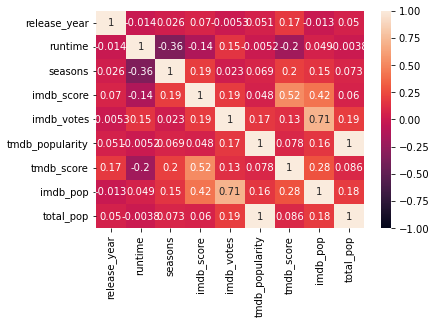

In [694]:
# 상관관계 heatmap 

sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

In [695]:
# 상위 imdb 10% 정렬

# 정렬 
imdb_top_10=df.nlargest(1806,"imdb_pop")


In [696]:
# 상위 tmdb 10% 정렬
tmdb_top_10=df.nlargest(1806,"tmdb_popularity")
tmdb_top_10

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,platform,imdb_pop,total_pop
11235,ts219003,Moon Knight,SHOW,"When Steven Grant, a mild-mannered gift-shop e...",2022,TV-14,48,"['action', 'scifi', 'drama', 'fantasy', 'horro...",['US'],1.0,tt10234724,7.5,128362.0,93.758724,8.500,AmazonPrime,3.010419,91.221112
19967,ts43075,Halo,SHOW,Depicting an epic 26th-century conflict betwee...,2022,TV-14,52,"['scifi', 'thriller', 'war', 'action']",['US'],1.0,tt2934286,7.1,31375.0,45.968274,8.700,Netflix,0.829959,44.706063
11239,tm375923,Turning Red,MOVIE,Thirteen-year-old Mei is experiencing the awkw...,2022,PG,100,"['fantasy', 'comedy', 'family', 'animation']",['US'],0.0,tt8097030,7.0,90356.0,23.331974,7.400,Disney,1.475836,22.720807
10778,tm123360,Doctor Strange,MOVIE,"After his career is destroyed, a brilliant but...",2016,PG-13,115,"['fantasy', 'action', 'scifi']",['US'],0.0,tt1211837,7.5,697884.0,22.873688,7.400,AmazonPrime,4.353546,22.355806
16113,tm1143265,Incantation,MOVIE,Inspired by a true story of a family who belie...,2022,Not Rated,111,['horror'],['TW'],0.0,tt18968540,6.2,5660.0,22.750119,7.400,Disney,-0.219648,22.107811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10394,tm174016,Cheaper by the Dozen 2,MOVIE,Steve Martin and Bonnie Hunt return as heads o...,2005,PG,94,"['comedy', 'family']","['CA', 'US']",0.0,tt0452598,5.5,58351.0,0.108944,6.100,AmazonPrime,-1.532316,0.063049
15270,ts88552,Go! Live Your Way,SHOW,Charismatic Mía gets a scholarship to an elite...,2019,TV-Y7,40,"['drama', 'romance', 'comedy', 'family']",['AR'],2.0,tt9654086,6.7,641.0,0.108894,9.100,NetflixParamount,-0.191365,0.100497
14470,ts82914,Dead to Me,SHOW,A hotheaded widow searching for the hit-and-ru...,2019,TV-MA,31,"['thriller', 'crime', 'drama', 'comedy']",['US'],2.0,tt8064302,8.0,74989.0,0.108380,7.299,AmazonPrime,3.370554,0.199601
10932,ts55686,Andi Mack,SHOW,Andi is contemplative and artistic and shelter...,2017,TV-G,25,"['drama', 'comedy', 'family']",['US'],3.0,tt5195114,7.3,2230.0,0.108078,8.200,Netflix,-0.081035,0.102790


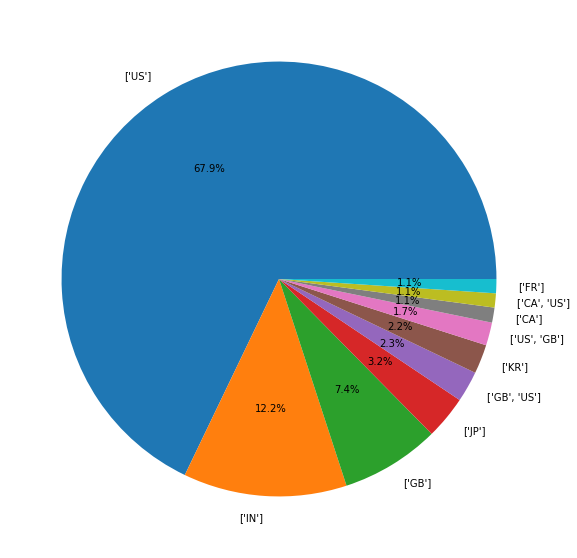

In [697]:
plt.figure(figsize=(15,10))
count_coutry_idx=imdb_top_10['production_countries'].value_counts().index[:10]
count_coutry_val=imdb_top_10['production_countries'].value_counts().values[:10]
plt.pie(count_coutry_val,labels=count_coutry_idx,autopct="%.1f%%")
plt.show()

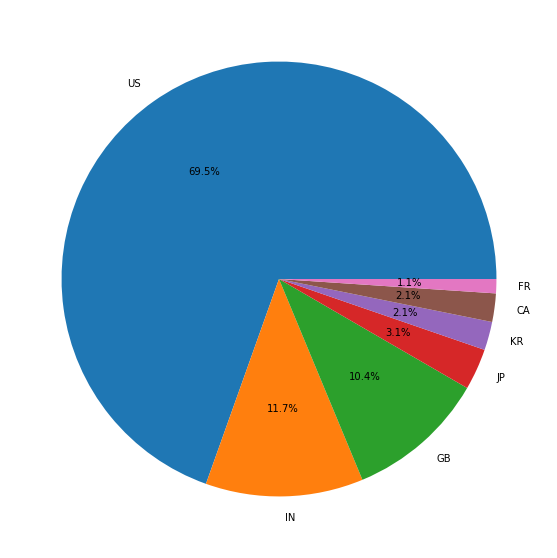

In [698]:
plt.figure(figsize=(15,10))
count_val2=[72.4,12.2,10.8,3.2,2.2,2.2,1.1]
count_idx2=["US", "IN", "GB", "JP", "KR", "CA", "FR" ]
plt.pie(count_val2,labels=count_idx2,autopct="%.1f%%")
plt.show()

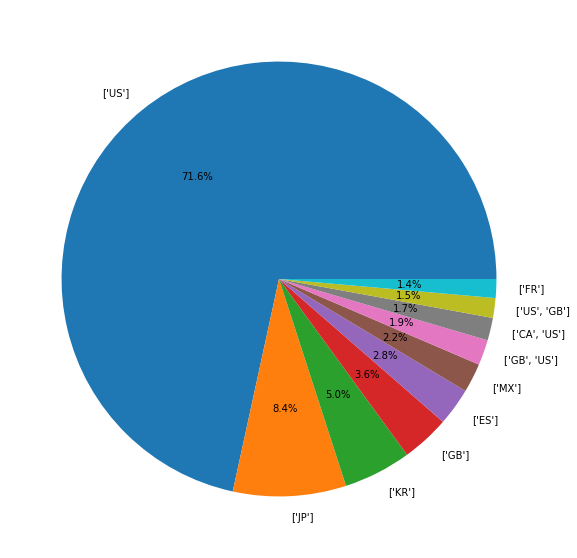

In [699]:
# tmdb pie country
plt.figure(figsize=(15,10))
count_coutry_idx=tmdb_top_10['production_countries'].value_counts().index[:10]
count_coutry_val=tmdb_top_10['production_countries'].value_counts().values[:10]
plt.pie(count_coutry_val,labels=count_coutry_idx,autopct="%.1f%%")
plt.show()

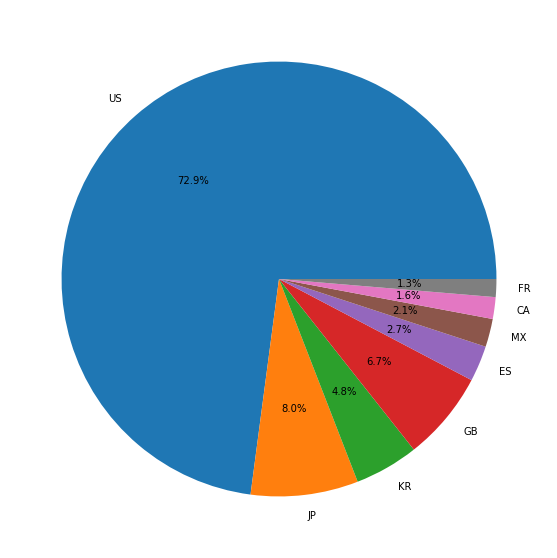

In [700]:
plt.figure(figsize=(15,10))
count_val2=[76.7,8.4,5.0,7,2.8,2.2,1.7,1.4]
count_idx2=["US", "JP", "KR", "GB", "ES", "MX", "CA","FR" ]
plt.pie(count_val2,labels=count_idx2,autopct="%.1f%%")
plt.show()

In [701]:
# 장르 나누고 시각화 하기 [영화 ,show]
import re


#f = lambda x : re.findall("\w+",x)
#type(f(df.iloc[0]["genres"])) -> list 

imdb_top_10["genres"] =imdb_top_10["genres"].apply(lambda x : re.findall("\w+",x))
tmdb_top_10["genres"] =tmdb_top_10["genres"].apply(lambda x : re.findall("\w+",x))

genres_list = list(imdb_top_10["genres"].values)
genres_list2 = list(tmdb_top_10["genres"].values)

new_genres_list =[]
new_genres_list2 =[]

for sublist in genres_list:
    for item in sublist:
        new_genres_list.append(item)

for sublist in genres_list2:
    for item in sublist:
        new_genres_list2.append(item)



new_genres_list = set(new_genres_list)
new_genres_list2 = set(new_genres_list2)

for i,genre in enumerate(new_genres_list):
    imdb_top_10[genre]=imdb_top_10["genres"].apply(lambda x: 1 if genre in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기

for i,genre in enumerate(new_genres_list2):
    tmdb_top_10[genre]=tmdb_top_10["genres"].apply(lambda x: 1 if genre in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기

    
imdb_top_10.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'platform', 'imdb_pop', 'total_pop', 'history', 'western',
       'animation', 'drama', 'scifi', 'comedy', 'crime', 'sport', 'romance',
       'action', 'music', 'fantasy', 'war', 'thriller', 'documentation',
       'european', 'horror', 'family', 'reality'],
      dtype='object')

In [702]:
new_genres_list

{'action',
 'animation',
 'comedy',
 'crime',
 'documentation',
 'drama',
 'european',
 'family',
 'fantasy',
 'history',
 'horror',
 'music',
 'reality',
 'romance',
 'scifi',
 'sport',
 'thriller',
 'war',
 'western'}

In [703]:
# imdb top 10 genre


genre_idbdm={}
genre_tmdb={}


for genre in new_genres_list:
    
    genre_idbdm[genre] = imdb_top_10[genre].sum()



for genre in new_genres_list:
    genre_tmdb[genre] = tmdb_top_10[genre].sum()




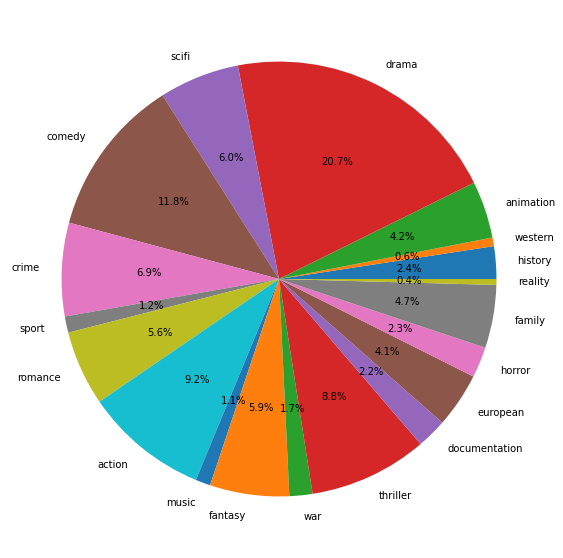

In [704]:
plt.figure(figsize=(15,10))
imdb_genres=pd.DataFrame.from_dict(genre_idbdm,orient="index").T
imdb_genres.values[0]


plt.pie(imdb_genres.values[0],labels=imdb_genres.columns,autopct="%.1f%%")
plt.show()

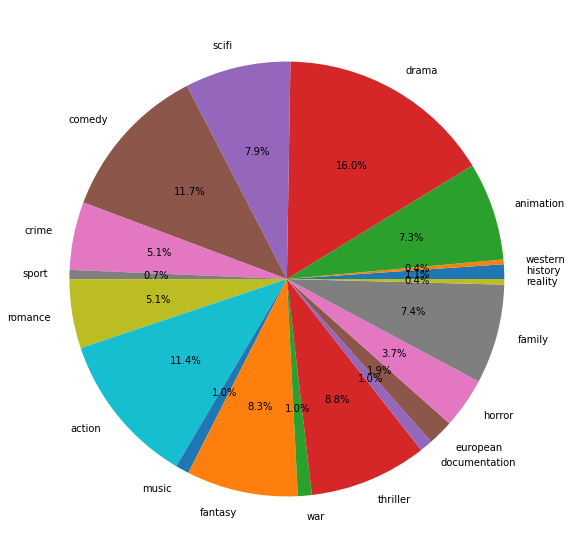

In [705]:
plt.figure(figsize=(15,10))
tmdb_genres=pd.DataFrame.from_dict(genre_tmdb,orient="index").T
tmdb_genres.values[0]


plt.pie(tmdb_genres.values[0],labels=tmdb_genres.columns,autopct="%.1f%%")
plt.show()

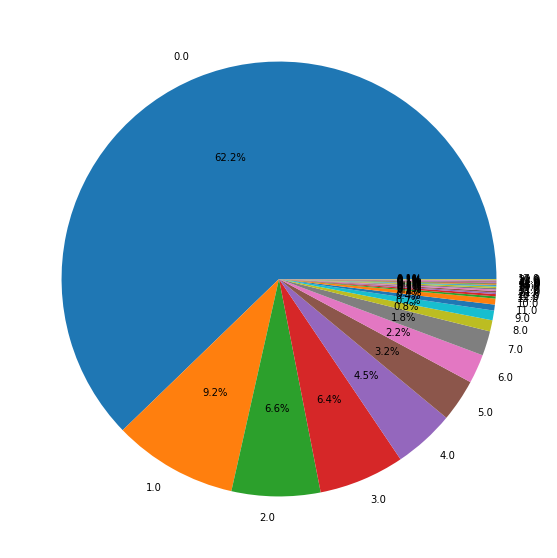

In [706]:
#imdb pie season
plt.figure(figsize=(15,10))
plt.pie(imdb_top_10["seasons"].value_counts().values,labels=imdb_top_10["seasons"].value_counts().index,autopct="%.1f%%")
plt.show()

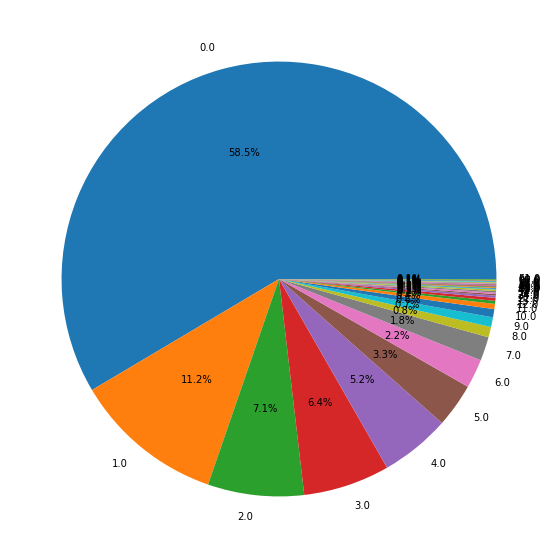

In [707]:
#tmdb pie season
plt.figure(figsize=(15,10))
plt.pie(tmdb_top_10["seasons"].value_counts().values,labels=tmdb_top_10["seasons"].value_counts().index,autopct="%.1f%%")
plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

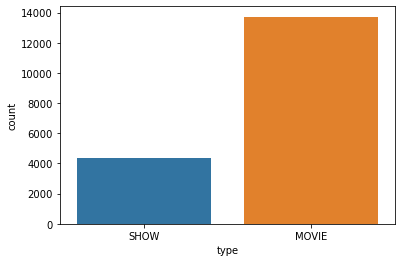

In [708]:
# movie show 시각화 
sns.countplot(data=df,x="type")


<AxesSubplot:xlabel='age_certification', ylabel='count'>

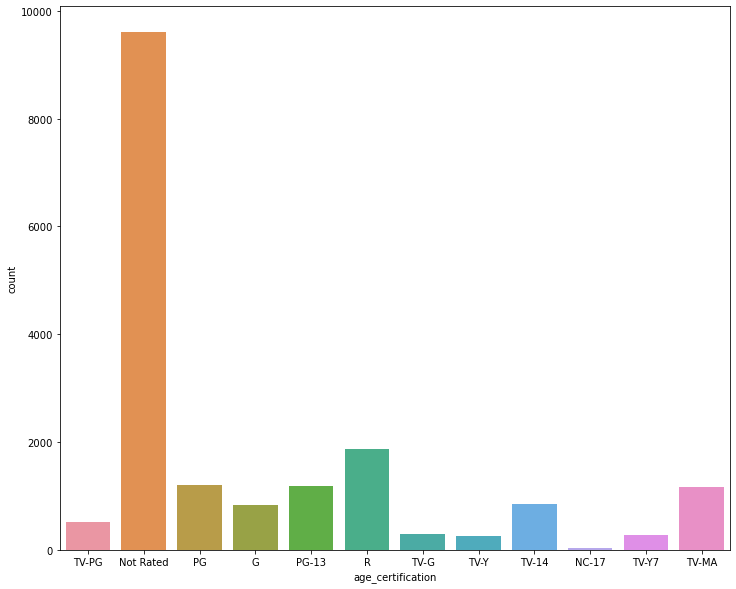

In [709]:
# age_criteran 시각화 
plt.figure(figsize=(12,10))
sns.countplot(data=df,x="age_certification")


In [710]:
# 장르 나누고 시각화 하기 [영화 ,show]
import re


#f = lambda x : re.findall("\w+",x)
#type(f(df.iloc[0]["genres"])) -> list 

df["genres"] =df["genres"].apply(lambda x : re.findall("\w+",x))
genres_list = list(df["genres"].values)

new_genres_list =[]
for sublist in genres_list:
    for item in sublist:
        new_genres_list.append(item)



new_genres_list = set(new_genres_list)

for i,genre in enumerate(new_genres_list):
    df[genre]=df["genres"].apply(lambda x: 1 if genre in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기

    
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,action,music,fantasy,war,thriller,documentation,european,horror,family,reality
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"[comedy, family, animation, action, fantasy, h...",['US'],26.0,...,1,0,1,0,0,0,0,1,1,0
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,Not Rated,78,"[action, drama, war, western, comedy, european]",['US'],0.0,...,1,0,0,1,0,0,1,0,0,0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,Not Rated,171,"[romance, war, drama]",['US'],0.0,...,0,0,0,1,0,0,0,0,0,0
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,Not Rated,92,"[comedy, drama, romance]",['US'],0.0,...,0,0,0,0,0,0,0,0,0,0
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,Not Rated,94,"[thriller, drama, romance]",['US'],0.0,...,0,0,0,0,1,0,0,0,0,0


In [711]:
# 시각화 위한 전처리 

# 영화중에서 각 장르별 개수 센다 
genre_movie_dict = {}

for genre in new_genres_list:
    genre_movie_dict[genre] = df.query("type == 'MOVIE'")[genre].sum()

genre_movie_dict = dict(sorted(genre_movie_dict.items(), key=lambda x: x[0]))

# show중에서 장르별 개수 센다 
genre_series_dict = {}

for genre in new_genres_list:
    genre_series_dict[genre] = df.query("type == 'SHOW'")[genre].sum()

genre_series_dict = dict(sorted(genre_series_dict.items(), key=lambda x: x[0]))




In [712]:
genre_all_dict = {}

for genre in new_genres_list:
    genre_all_dict[genre] = df[genre].sum()

genre_all_dict = dict(sorted(genre_movie_dict.items(), key=lambda x: x[0]))


<AxesSubplot:>

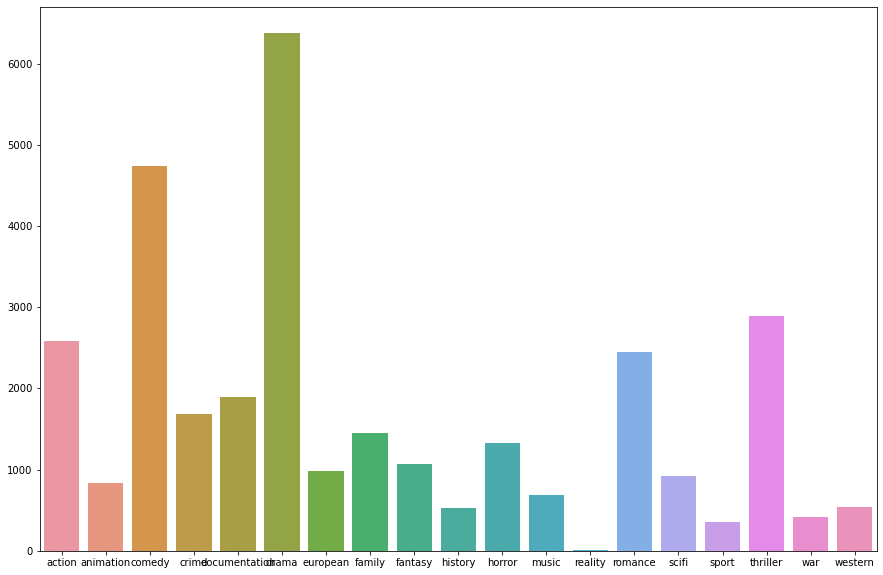

In [713]:
plt.figure(figsize=(15,10))
movie_genres=pd.DataFrame.from_dict(genre_all_dict,orient="index").T
sns.barplot(data=movie_genres)

<AxesSubplot:>

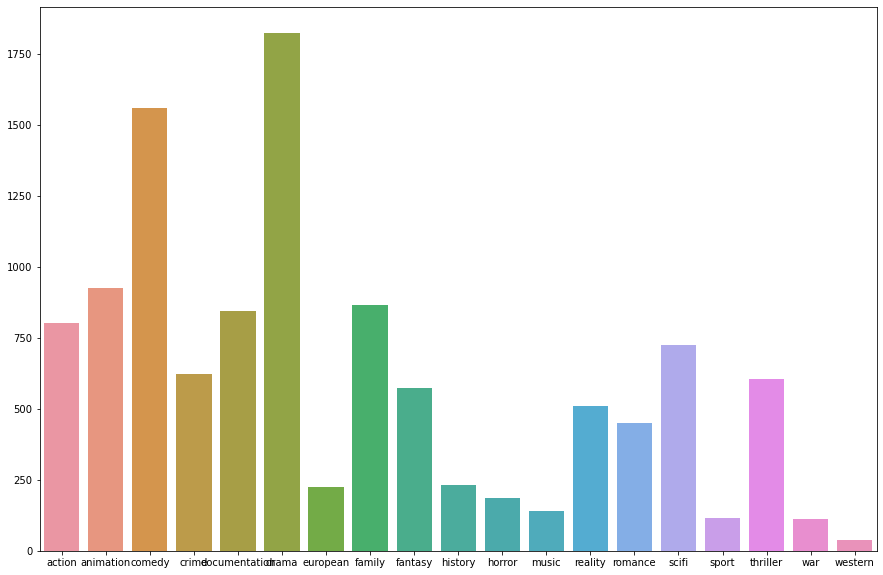

In [714]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
show_genres=pd.DataFrame.from_dict(genre_series_dict,orient="index").T
sns.barplot(data=show_genres)

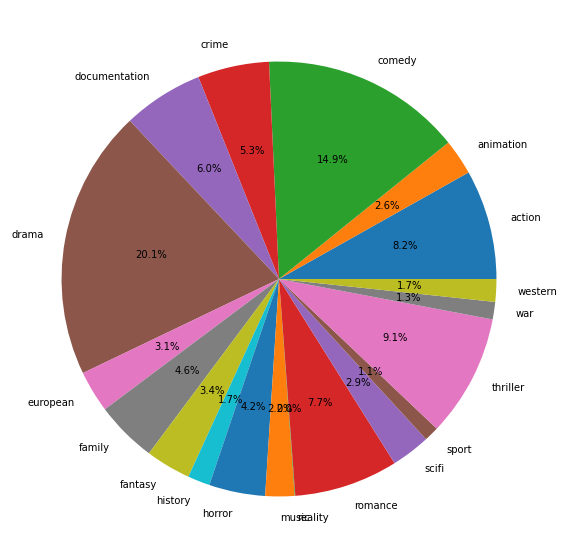

In [715]:
# all
plt.figure(figsize=(15,10))
movie_genres=pd.DataFrame.from_dict(genre_all_dict,orient="index").T

plt.pie(movie_genres.values[0],labels=movie_genres.columns,autopct="%.1f%%")
plt.show()

In [716]:
# 장르별 ibdm score 시각화 하기 -> 평균값으로 했다 

genre_movie_idbdm={}
genre_show_idbdm={}

for i,genre in enumerate(new_genres_list):
    genre_movie_idbdm[genre] = df[df["type"]=="MOVIE"].groupby(genre)["imdb_score"].mean().sort_index().__getitem__(1)

    
    
for i,genre in enumerate(new_genres_list):
    genre_show_idbdm[genre] = df[df["type"]=="SHOW"].groupby(genre)["imdb_score"].mean().sort_index().__getitem__(1)
    



<AxesSubplot:>

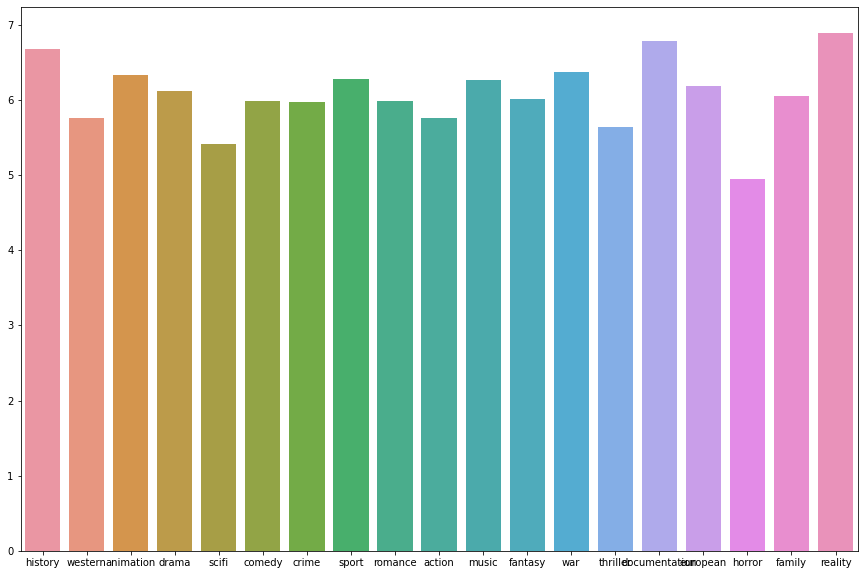

In [717]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
movie_genr=pd.DataFrame.from_dict(genre_movie_idbdm,orient="index").T
sns.barplot(data=movie_genr)

<AxesSubplot:>

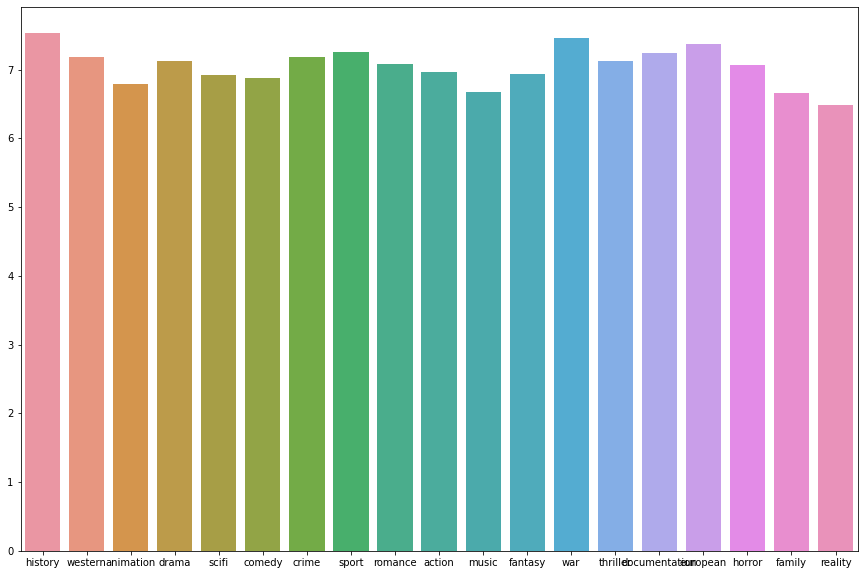

In [718]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
show_genr=pd.DataFrame.from_dict(genre_show_idbdm,orient="index").T
sns.barplot(data=show_genr)

In [719]:
df['production_countries'].value_counts().index[:20]

Index(['['US']', '['IN']', '[]', '['GB']', '['CA']', '['JP']', '['KR']',
       '['FR']', '['ES']', '['AU']', '['CN']', '['CA', 'US']', '['XX']',
       '['MX']', '['DE']', '['GB', 'US']', '['IT']', '['BR']', '['PH']',
       '['US', 'CA']'],
      dtype='object')

<AxesSubplot:xlabel='production_countries', ylabel='count'>

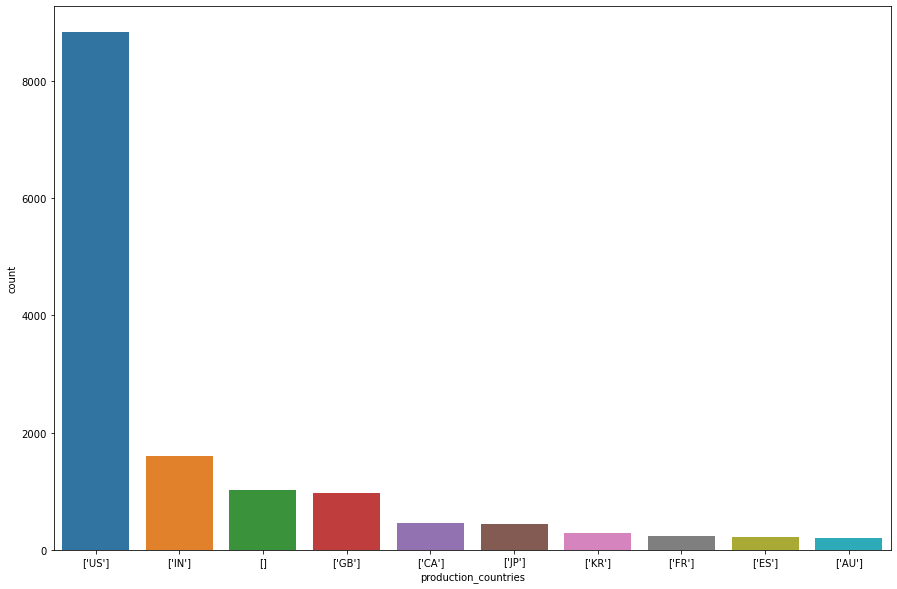

In [720]:
# 나라별 시각화 

plt.figure(figsize=(15,10))

sns.countplot(data=df,x="production_countries",order = df['production_countries'].value_counts().index[:10]) 
# 각 독립적인 나라별로만 시각화 한것이다
